In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
with open('../data/static_dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head(1)

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,participant10_win
0,1742,1696541391832,13.19.534.5972,11,420,19,13,EUW1,98,MASTER,...,3.5,7.0,14.5,None,9.0,28.0,6817.0,8665.0,200,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 0
Columns: 268 entries, gameDuration to participant10_win
dtypes: bool(50), float64(90), int64(66), object(62)
memory usage: 158.4+ KB


In [5]:
df.describe()

,gameDuration,gameCreation,mapId,queueId,patch,seasonId,participant1_level,participant1_rank,participant1_leaguePoints,participant1_wins,...,participant10_champion_tokensEarned,participant10_champion_kda,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId
count,90.000000,9.000000e+01,90.0,90.0,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,90.0
mean,1633.788889,1.696350e+12,11.0,420.0,18.922222,13.0,389.122222,1.666667,42.133333,101.355556,...,0.542169,3.002169,2.157831,5.773494,13.744578,10.734940,29.383133,8936.072289,7827.578313,200.0
std,278.556653,3.361140e+08,0.0,0.0,0.269322,0.0,291.579497,1.027706,62.979968,103.756338,...,0.953827,1.122167,1.348542,1.664997,3.042674,2.794089,15.789853,4647.353736,1137.134193,0.0
min,969.000000,1.695675e+12,11.0,420.0,18.000000,13.0,38.000000,1.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,2.400000,7.000000,4.000000,7.100000,3172.000000,5419.000000,200.0
25%,1436.000000,1.696129e+12,11.0,420.0,19.000000,13.0,127.000000,1.000000,1.000000,29.250000,...,0.000000,2.170000,1.300000,4.600000,11.750000,9.000000,23.200000,6091.000000,7217.000000,200.0
50%,1628.500000,1.696346e+12,11.0,420.0,19.000000,13.0,362.000000,1.000000,24.000000,73.000000,...,0.000000,2.830000,1.800000,5.700000,14.000000,11.000000,29.800000,7436.000000,7564.000000,200.0
75%,1806.000000,1.696665e+12,11.0,420.0,19.000000,13.0,551.250000,2.000000,55.000000,147.000000,...,1.000000,3.560000,2.700000,6.750000,15.350000,12.000000,33.500000,10338.500000,8447.500000,200.0
max,2313.000000,1.696928e+12,11.0,420.0,19.000000,13.0,1169.000000,4.000000,390.000000,662.000000,...,3.000000,6.840000,6.500000,10.500000,23.000000,17.000000,139.800000,24297.000000,11130.000000,200.0


In [6]:
df.dtypes

gameDuration                       int64
gameCreation                       int64
gameVersion                       object
mapId                              int64
queueId                            int64
                                  ...   
participant10_champion_cs        float64
participant10_champion_damage    float64
participant10_champion_gold      float64
participant10_teamId               int64
participant10_win                   bool
Length: 268, dtype: object

<Axes: >

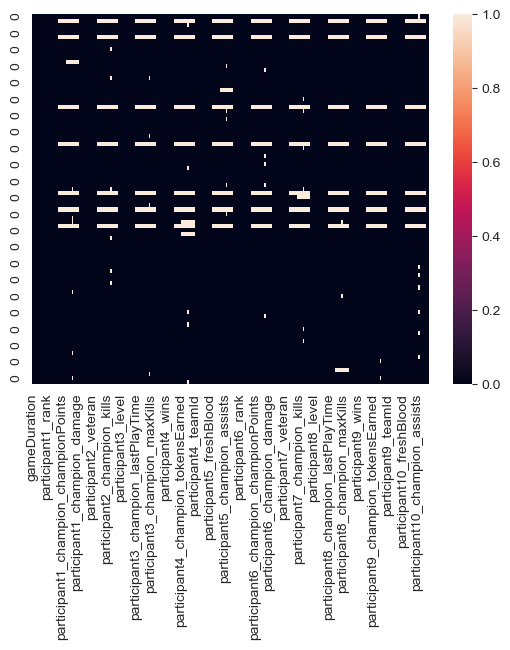

In [7]:
sns.heatmap(df.isna())

C:\Users\morit\AppData\Local\Temp\ipykernel_25620\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

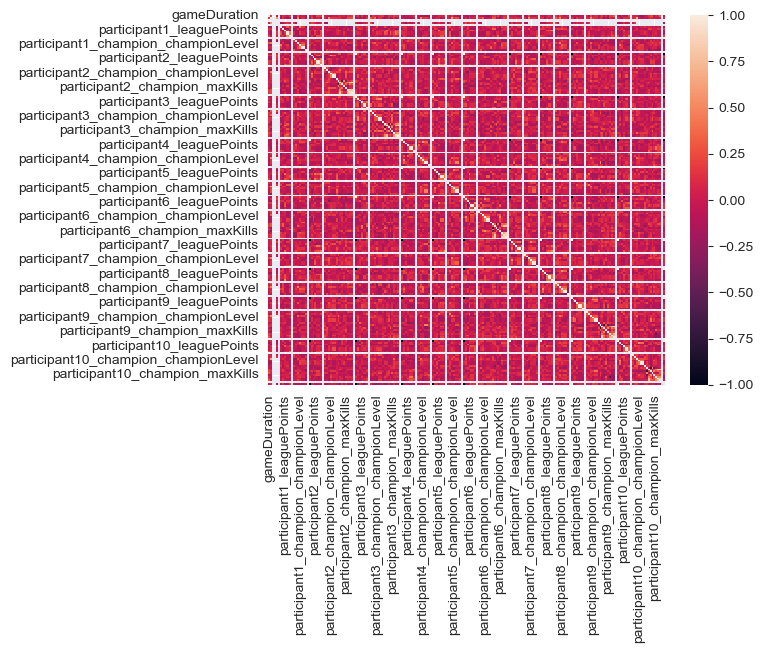

In [8]:
sns.heatmap(df.corr())

the first 5 participants are always in the same team:

In [9]:
df['participant1_win'] == df['participant2_win']

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Length: 90, dtype: bool

In [10]:
df.head()

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,participant10_win
0,1742,1696541391832,13.19.534.5972,11,420,19,13,EUW1,98,MASTER,...,3.5,7.0,14.5,None,9.0,28.0,6817.0,8665.0,200,False
0,1520,1695733104056,13.18.530.4653,11,420,18,13,EUW1,1169,DIAMOND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,False
0,1786,1696372882132,13.19.533.1909,11,420,19,13,EUW1,479,DIAMOND,...,0.9,3.5,14.0,785,8.0,16.5,4056.0,7305.0,200,True
0,1807,1696590617635,13.19.534.5972,11,420,19,13,EUW1,795,DIAMOND,...,1.0,4.9,14.4,162,11.0,9.6,4655.0,7276.0,200,False
0,1685,1696925974403,13.19.534.5972,11,420,19,13,EUW1,362,SILVER,...,5.1,5.8,12.8,339,14.0,33.8,20342.0,10155.0,200,True


In [11]:
def get_winning_team(df: pd.DataFrame):
    df['label'] = np.where(df['participant1_win'], 0, 1)  # 0 = team1 won, 1 = team2 won 

In [12]:
get_winning_team(df)

In [13]:
def drop_wrong_data(df: pd.DataFrame):
    len_before = len(df)
    df.drop(df[df['mapId'] != 11].index, inplace=True)
    df.drop(df[df['queueId'] != 420].index, inplace=True)
    df.drop(df[df['gameDuration'] < 900].index, inplace=True)
    df.drop(df[df['platformId'] != 'EUW1'].index, inplace=True)
    df.drop(df[df['seasonId'] != 13].index, inplace=True)
    df.drop(df[df['gameVersion'] != df['gameVersion'][0]].index, inplace=True)
    df.drop(df[df['patch'] != df['patch'][0]].index, inplace=True)
    print(f'dropped {len_before - len(df)} rows')

In [14]:
df

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,participant10_win,label
0,1742,1696541391832,13.19.534.5972,11,420,19,13,EUW1,98,MASTER,...,7.0,14.5,None,9.0,28.0,6817.0,8665.0,200,False,0
0,1520,1695733104056,13.18.530.4653,11,420,18,13,EUW1,1169,DIAMOND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,False,0
0,1786,1696372882132,13.19.533.1909,11,420,19,13,EUW1,479,DIAMOND,...,3.5,14.0,785,8.0,16.5,4056.0,7305.0,200,True,1
0,1807,1696590617635,13.19.534.5972,11,420,19,13,EUW1,795,DIAMOND,...,4.9,14.4,162,11.0,9.6,4655.0,7276.0,200,False,0
0,1685,1696925974403,13.19.534.5972,11,420,19,13,EUW1,362,SILVER,...,5.8,12.8,339,14.0,33.8,20342.0,10155.0,200,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1628,1696760486406,13.19.534.5972,11,420,19,13,EUW1,1001,DIAMOND,...,9.0,12.5,15,12.0,29.5,8308.0,6185.0,200,False,0
0,1388,1696712924496,13.19.534.5972,11,420,19,13,EUW1,288,MASTER,...,6.2,16.5,5,15.0,31.4,7326.0,7313.0,200,False,0
0,1888,1696416435644,13.19.534.5972,11,420,19,13,EUW1,56,MASTER,...,5.7,13.8,145,11.0,27.9,4994.0,7202.0,200,True,1
0,1665,1696552376927,13.19.534.5972,11,420,19,13,EUW1,49,DIAMOND,...,5.4,15.6,217,11.0,34.2,16426.0,9610.0,200,False,0


In [15]:
drop_wrong_data(df)

dropped 0 rows


In [16]:
def drop_irrelevant(df: pd.DataFrame):
    irrelevant_cols = ['gameDuration', 'gameCreation', 'gameVersion', 'mapId', 'queueId', 'patch', 'seasonId',
                       'platformId']
    for i in range(1, 11):
        irrelevant_cols.append(f'participant{i}_win')
    df.drop(columns=irrelevant_cols, inplace=True)


In [17]:
drop_irrelevant(df)

In [18]:
df.reset_index(inplace=True, drop=True)
df

,participant1_level,participant1_tier,participant1_rank,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,98,MASTER,1,207,131,120,False,False,True,False,...,3.5,7.0,14.5,None,9.0,28.0,6817.0,8665.0,200,0
1,1169,DIAMOND,3,56,198,188,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,0
2,479,DIAMOND,3,29,42,30,False,False,False,False,...,0.9,3.5,14.0,785,8.0,16.5,4056.0,7305.0,200,1
3,795,DIAMOND,2,29,86,66,False,False,True,False,...,1.0,4.9,14.4,162,11.0,9.6,4655.0,7276.0,200,0
4,362,SILVER,4,29,4,3,False,False,False,False,...,5.1,5.8,12.8,339,14.0,33.8,20342.0,10155.0,200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1001,DIAMOND,3,0,76,71,False,False,False,False,...,0.0,9.0,12.5,15,12.0,29.5,8308.0,6185.0,200,0
86,288,MASTER,1,28,23,17,False,False,False,False,...,1.5,6.2,16.5,5,15.0,31.4,7326.0,7313.0,200,0
87,56,MASTER,1,211,172,113,False,False,False,False,...,0.9,5.7,13.8,145,11.0,27.9,4994.0,7202.0,200,1
88,49,DIAMOND,1,16,87,61,False,False,True,False,...,3.3,5.4,15.6,217,11.0,34.2,16426.0,9610.0,200,0


In [19]:
from enum import Enum


class Rank(Enum):
    IRON = 0
    BRONZE = 1
    SILVER = 2
    GOLD = 3
    PLATINUM = 4
    EMERALD = 5
    DIAMOND = 6
    MASTER = 7
    GRANDMASTER = 8
    CHALLENGER = 9


def format_rank(tier: str, rank: str) -> str:
    return f'{tier}.{rank}'


def fix_rank(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].apply(lambda x: Rank[x].value)
        df.loc[:, f'participant{i}_tier'] = df.apply(
            lambda x: format_rank(x[f'participant{i}_tier'], x[f'participant{i}_rank']), axis=1)
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].astype(float)
        df.drop(columns=[f'participant{i}_rank'], inplace=True)

In [20]:
fix_rank(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,98,7.1,207,131,120,False,False,True,False,1.696710e+12,...,3.5,7.0,14.5,None,9.0,28.0,6817.0,8665.0,200,0
1,1169,6.3,56,198,188,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,0
2,479,6.3,29,42,30,False,False,False,False,1.696428e+12,...,0.9,3.5,14.0,785,8.0,16.5,4056.0,7305.0,200,1
3,795,6.2,29,86,66,False,False,True,False,1.696905e+12,...,1.0,4.9,14.4,162,11.0,9.6,4655.0,7276.0,200,0
4,362,2.4,29,4,3,False,False,False,False,1.696928e+12,...,5.1,5.8,12.8,339,14.0,33.8,20342.0,10155.0,200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1001,6.3,0,76,71,False,False,False,False,1.696762e+12,...,0.0,9.0,12.5,15,12.0,29.5,8308.0,6185.0,200,0
86,288,7.1,28,23,17,False,False,False,False,1.696796e+12,...,1.5,6.2,16.5,5,15.0,31.4,7326.0,7313.0,200,0
87,56,7.1,211,172,113,False,False,False,False,1.696878e+12,...,0.9,5.7,13.8,145,11.0,27.9,4994.0,7202.0,200,1
88,49,6.1,16,87,61,False,False,True,False,1.696708e+12,...,3.3,5.4,15.6,217,11.0,34.2,16426.0,9610.0,200,0


In [21]:
def calc_winrate(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_winrate'] = df[f'participant{i}_wins'] / (
                df[f'participant{i}_wins'] + df[f'participant{i}_losses'])
        df.drop(columns=[f'participant{i}_wins', f'participant{i}_losses'], inplace=True)

In [22]:
calc_winrate(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,participant1_champion_championLevel,participant1_champion_championPoints,...,participant1_winrate,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate
0,98,7.1,207,False,False,True,False,1.696710e+12,2.0,3837.0,...,0.521912,0.645161,0.510582,0.542088,0.727273,0.555556,0.722222,0.516588,0.498476,0.333333
1,1169,6.3,56,False,False,False,False,NaN,NaN,NaN,...,0.512953,0.645161,0.494505,0.497297,0.556098,0.666667,0.546326,0.513382,0.533654,0.505236
2,479,6.3,29,False,False,False,False,1.696428e+12,7.0,592841.0,...,0.583333,0.647059,0.493976,0.809524,0.542522,0.497696,0.645161,0.507868,0.530233,0.562500
3,795,6.2,29,False,False,True,False,1.696905e+12,5.0,482286.0,...,0.565789,0.707317,0.650794,0.623377,0.583333,0.645161,0.503185,0.511450,0.375000,0.600000
4,362,2.4,29,False,False,False,False,1.696928e+12,7.0,106023.0,...,0.571429,0.547368,0.636364,0.564516,0.504132,0.777778,0.488889,0.598958,0.509091,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1001,6.3,0,False,False,False,False,1.696762e+12,7.0,974071.0,...,0.517007,0.488889,0.513514,0.519231,0.552448,0.567839,0.523810,0.528090,0.428571,0.571429
86,288,7.1,28,False,False,False,False,1.696796e+12,7.0,183203.0,...,0.575000,0.556886,0.502573,0.466667,0.525490,0.495726,0.538462,0.363636,0.623377,0.501916
87,56,7.1,211,False,False,False,False,1.696878e+12,5.0,66325.0,...,0.603509,0.200000,0.900000,0.505682,0.578947,0.529412,0.529412,0.530675,0.538095,0.490323
88,49,6.1,16,False,False,True,False,1.696708e+12,2.0,2861.0,...,0.587838,0.526718,0.582278,0.542169,0.504167,0.519435,0.462264,0.552795,0.543624,0.485714


In [23]:
def fix_teamId(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_teamId'] = df[f'participant{i}_teamId'] // 100 - 1

In [24]:
fix_teamId(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,participant1_champion_championLevel,participant1_champion_championPoints,...,participant1_winrate,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate
0,98,7.1,207,False,False,True,False,1.696710e+12,2.0,3837.0,...,0.521912,0.645161,0.510582,0.542088,0.727273,0.555556,0.722222,0.516588,0.498476,0.333333
1,1169,6.3,56,False,False,False,False,NaN,NaN,NaN,...,0.512953,0.645161,0.494505,0.497297,0.556098,0.666667,0.546326,0.513382,0.533654,0.505236
2,479,6.3,29,False,False,False,False,1.696428e+12,7.0,592841.0,...,0.583333,0.647059,0.493976,0.809524,0.542522,0.497696,0.645161,0.507868,0.530233,0.562500
3,795,6.2,29,False,False,True,False,1.696905e+12,5.0,482286.0,...,0.565789,0.707317,0.650794,0.623377,0.583333,0.645161,0.503185,0.511450,0.375000,0.600000
4,362,2.4,29,False,False,False,False,1.696928e+12,7.0,106023.0,...,0.571429,0.547368,0.636364,0.564516,0.504132,0.777778,0.488889,0.598958,0.509091,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1001,6.3,0,False,False,False,False,1.696762e+12,7.0,974071.0,...,0.517007,0.488889,0.513514,0.519231,0.552448,0.567839,0.523810,0.528090,0.428571,0.571429
86,288,7.1,28,False,False,False,False,1.696796e+12,7.0,183203.0,...,0.575000,0.556886,0.502573,0.466667,0.525490,0.495726,0.538462,0.363636,0.623377,0.501916
87,56,7.1,211,False,False,False,False,1.696878e+12,5.0,66325.0,...,0.603509,0.200000,0.900000,0.505682,0.578947,0.529412,0.529412,0.530675,0.538095,0.490323
88,49,6.1,16,False,False,True,False,1.696708e+12,2.0,2861.0,...,0.587838,0.526718,0.582278,0.542169,0.504167,0.519435,0.462264,0.552795,0.543624,0.485714


In [25]:
def convert_booleans(df: pd.DataFrame):
    df.replace({True: 1, False: 0}, inplace=True)

In [26]:
convert_booleans(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,participant1_champion_championLevel,participant1_champion_championPoints,...,participant1_winrate,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate
0,98,7.1,207,0,0,1,0,1.696710e+12,2.0,3837.0,...,0.521912,0.645161,0.510582,0.542088,0.727273,0.555556,0.722222,0.516588,0.498476,0.333333
1,1169,6.3,56,0,0,0,0,NaN,NaN,NaN,...,0.512953,0.645161,0.494505,0.497297,0.556098,0.666667,0.546326,0.513382,0.533654,0.505236
2,479,6.3,29,0,0,0,0,1.696428e+12,7.0,592841.0,...,0.583333,0.647059,0.493976,0.809524,0.542522,0.497696,0.645161,0.507868,0.530233,0.562500
3,795,6.2,29,0,0,1,0,1.696905e+12,5.0,482286.0,...,0.565789,0.707317,0.650794,0.623377,0.583333,0.645161,0.503185,0.511450,0.375000,0.600000
4,362,2.4,29,0,0,0,0,1.696928e+12,7.0,106023.0,...,0.571429,0.547368,0.636364,0.564516,0.504132,0.777778,0.488889,0.598958,0.509091,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1001,6.3,0,0,0,0,0,1.696762e+12,7.0,974071.0,...,0.517007,0.488889,0.513514,0.519231,0.552448,0.567839,0.523810,0.528090,0.428571,0.571429
86,288,7.1,28,0,0,0,0,1.696796e+12,7.0,183203.0,...,0.575000,0.556886,0.502573,0.466667,0.525490,0.495726,0.538462,0.363636,0.623377,0.501916
87,56,7.1,211,0,0,0,0,1.696878e+12,5.0,66325.0,...,0.603509,0.200000,0.900000,0.505682,0.578947,0.529412,0.529412,0.530675,0.538095,0.490323
88,49,6.1,16,0,0,1,0,1.696708e+12,2.0,2861.0,...,0.587838,0.526718,0.582278,0.542169,0.504167,0.519435,0.462264,0.552795,0.543624,0.485714


In [30]:
from datetime import datetime

print(int((datetime.now() - datetime.fromtimestamp(159089)).total_seconds()))


def convert_lastPlayTime(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_champion_lastPlayTime'] = df[f'participant{i}_champion_lastPlayTime'].apply(
            lambda x: int((datetime.now() - datetime.fromtimestamp(x / 1000)).total_seconds()))

1696783994


In [31]:
convert_lastPlayTime(df)
df

OSError: [Errno 22] Invalid argument

In [ ]:
df.isna().sum()

In [ ]:
len(df)

In [29]:
df.fillna(-1, inplace=True)

In [ ]:
df

In [ ]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], stat='density', kde=True)

In [ ]:
df.to_pickle('../data/processed_static_dataset.pkl', protocol=-1)